<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [2]:
seed = 0

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/data/features_30_sec.csv')

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df.drop(['filename', 'length'], axis=1, inplace=True)

In [6]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']

In [7]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)
labels = encoder.categories_[0]

In [8]:
n_samples = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=round(0.7 * n_samples), stratify=y, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=round(0.15 * n_samples), stratify=y_test, random_state=seed)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
model_layers = [
    Input(X_train.shape[1]),

    Dense(48, activation='relu'),
    Dense(48, activation='relu'),
    Dense(48, activation='relu'),

    Dense(10, activation='softmax')
]

model = Sequential(model_layers)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                2784      
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dense_2 (Dense)             (None, 48)                2352      
                                                                 
 dense_3 (Dense)             (None, 10)                490       
                                                                 
Total params: 7,978
Trainable params: 7,978
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=10)

Epoch 1/20
70/70 [==============================] - 2s 10ms/step - loss: 2.0548 - accuracy: 0.2986 - val_loss: 1.7356 - val_accuracy: 0.3733
Epoch 2/20
70/70 [==============================] - 0s 4ms/step - loss: 1.4974 - accuracy: 0.4786 - val_loss: 1.3873 - val_accuracy: 0.5333
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 1.1891 - accuracy: 0.5714 - val_loss: 1.1960 - val_accuracy: 0.6333
Epoch 4/20
70/70 [==============================] - 0s 6ms/step - loss: 0.9926 - accuracy: 0.6529 - val_loss: 1.1682 - val_accuracy: 0.6067
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 0.8643 - accuracy: 0.6943 - val_loss: 0.9954 - val_accuracy: 0.6933
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 0.7598 - accuracy: 0.7343 - val_loss: 0.9974 - val_accuracy: 0.6733
Epoch 7/20
70/70 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.7571 - val_loss: 0.8741 - val_accuracy: 0.7333
Epoch 8/20
70/70 [=

In [14]:
_, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {accuracy}')

22/22 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9871
Training Accuracy: 0.9871428608894348


In [15]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

5/5 [==============================] - 0s 2ms/step


In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.93      0.87      0.90        15
           2       0.80      0.80      0.80        15
           3       0.83      0.67      0.74        15
           4       0.83      0.67      0.74        15
           5       0.80      0.80      0.80        15
           6       0.82      0.93      0.87        15
           7       0.70      0.93      0.80        15
           8       0.46      0.40      0.43        15
           9       0.65      0.73      0.69        15

    accuracy                           0.75       150
   macro avg       0.76      0.75      0.75       150
weighted avg       0.76      0.75      0.75       150



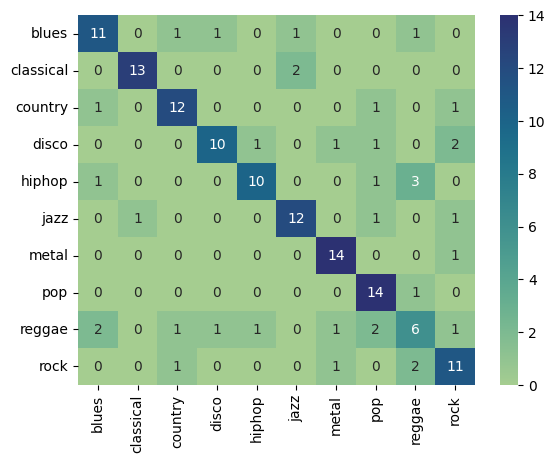

In [17]:
conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [18]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall test accuracy = {accuracy}')

Overall test accuracy = 0.7533333333333333


In [19]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.73
classical,0.87
country,0.80
disco,0.67
hiphop,0.67
jazz,0.80
metal,0.93
pop,0.93
reggae,0.40
rock,0.73


In [20]:
model.save('ANN.h5')